In [1]:
# Step 1: Load Dataset
import pandas as pd
df = pd.read_csv("gold_price_data.csv")
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (5215, 7)

Column names: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']

First 5 rows:
          date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [2]:
# Step 2: Check for Missing Values and Duplicates
print("\nMissing values in each column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates() 
df = df.dropna()            

print("\nShape after cleaning:", df.shape)


Missing values in each column:
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

Number of duplicate rows: 0

Shape after cleaning: (5215, 7)



Descriptive Statistics:
               open         high          low        close    adj_close  \
count  5215.000000  5215.000000  5215.000000  5215.000000  5215.000000   
mean    131.940968   131.940968   132.570993   131.256556   131.939183   
std      51.291094    51.291094    51.459284    51.073175    51.282084   
min      41.259998    41.259998    41.360001    41.020000    41.029999   
25%     104.730000   104.730000   105.355000   104.160000   104.754997   
50%     124.400002   124.400002   124.870003   123.980003   124.459999   
75%     164.779999   164.779999   165.489998   164.004997   164.544998   
max     316.290009   316.290009   317.630005   315.040009   317.489990   

             volume  
count  5.215000e+03  
mean   9.423568e+06  
std    6.645282e+06  
min    3.193000e+05  
25%    5.305150e+06  
50%    7.818800e+06  
75%    1.154915e+07  
max    9.380420e+07  


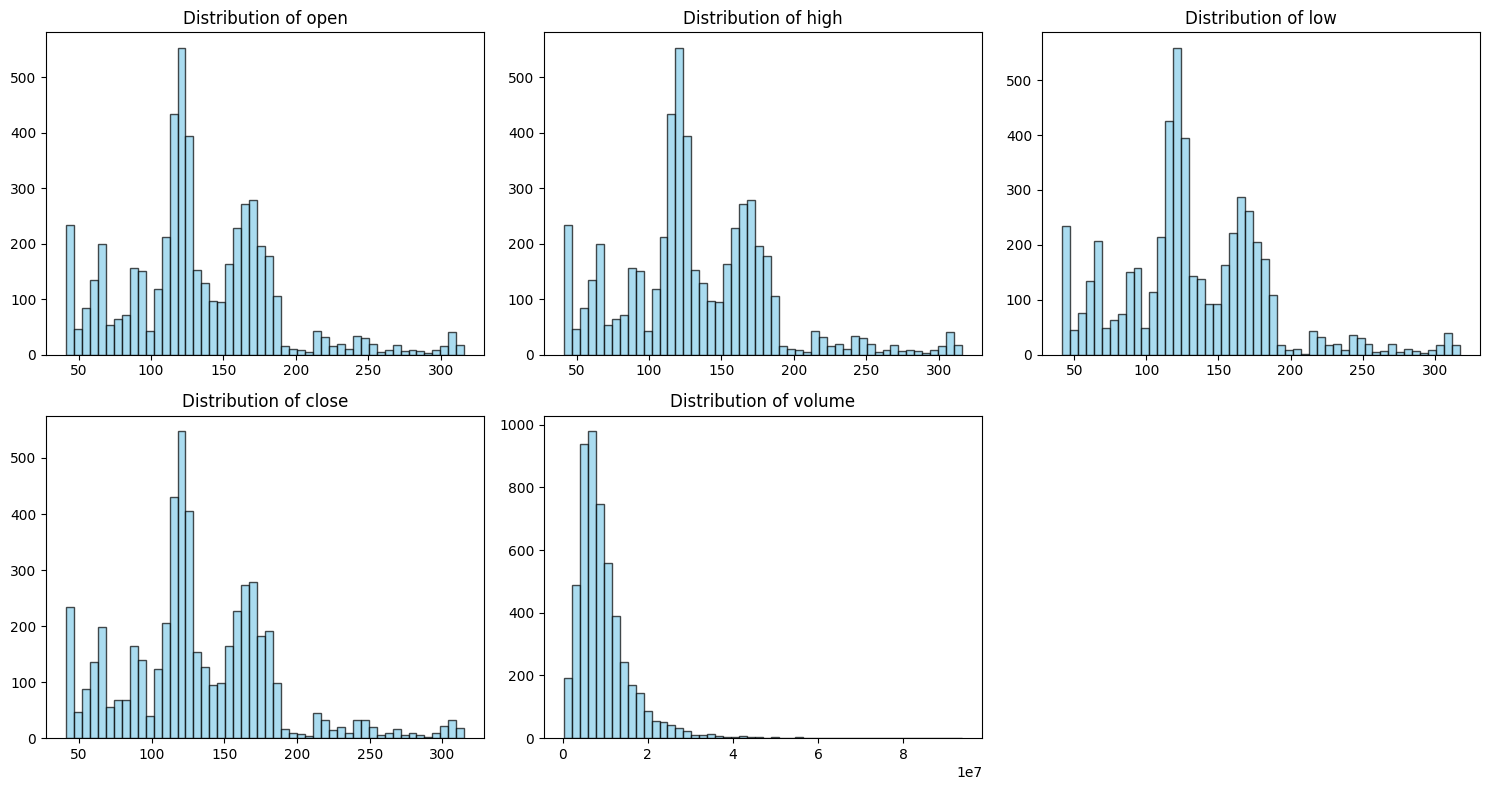

In [3]:
# Step 3: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
print("\nDescriptive Statistics:\n", df.describe())
num_cols = ["open", "high", "low", "close", "volume"]
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=50, alpha=0.7, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


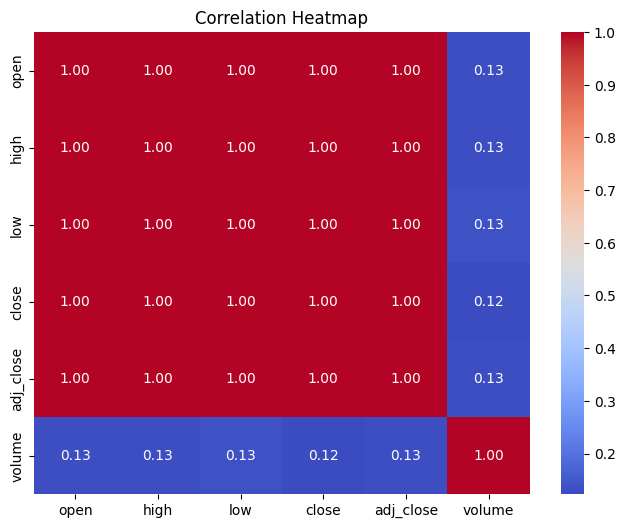


Correlation with target (close):

close        1.000000
open         0.999920
high         0.999920
adj_close    0.999894
low          0.999864
volume       0.122853
Name: close, dtype: float64


In [4]:
# Step 4: Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print("\nCorrelation with target (close):\n")
print(corr_matrix["close"].sort_values(ascending=False))


In [5]:
# Step 5: Select Features (X = independent variables, y = target)
X = df[["open", "high", "low", "volume"]]
y = df["close"]

print("Independent Variables (X):\n", X.head())
print("\nTarget Variable (y):\n", y.head())


Independent Variables (X):
         open       high        low    volume
0  44.380001  44.380001  44.490002   5992000
1  44.779999  44.779999  44.919998  11655300
2  44.950001  44.950001  44.970001  11996000
3  44.750000  44.750000  44.919998   3169200
4  45.049999  45.049999  45.049999   6105100

Target Variable (y):
 0    44.070000
1    44.470001
2    44.740002
3    44.720001
4    44.790001
Name: close, dtype: float64


In [6]:
# Step 6: Split the dataset into Training (80%) and Testing (20%) sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4172, 4)
X_test shape: (1043, 4)
y_train shape: (4172,)
y_test shape: (1043,)


In [7]:
# Step 7: Train a Linear Regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")


✅ Linear Regression model trained successfully!


In [8]:
# Step 8: Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


📊 Model Evaluation Results:
Mean Squared Error (MSE): 0.25845774875148936
Root Mean Squared Error (RMSE): 0.5083874002682298
R² Score: 0.9999031349631127


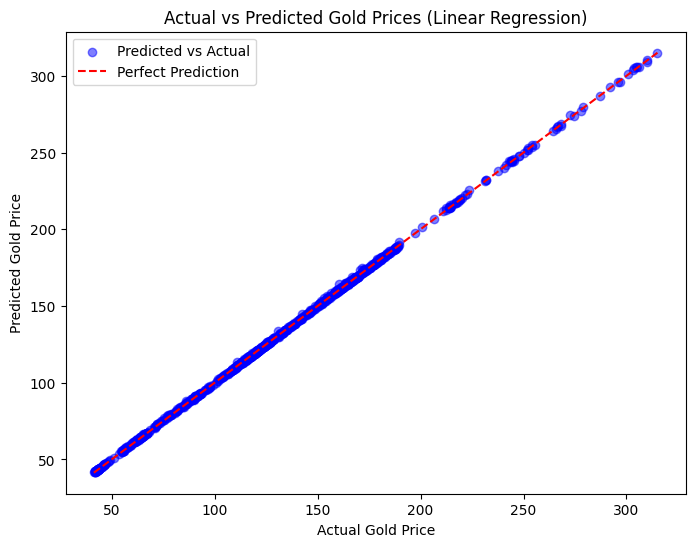

In [9]:
# Step 9: Plot Actual vs Predicted Prices

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Actual vs Predicted Gold Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.legend()
plt.show()


In [10]:
# Step 10: Interpret Model Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("Model Coefficients:\n", coeff_df)
print("\nIntercept:", model.intercept_)


Model Coefficients:
          Coefficient
open    2.881921e-01
high    2.881921e-01
low     4.188493e-01
volume -5.645234e-08

Intercept: 0.21487234143944534
